In [31]:
#KNN algorithm
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('Admission.csv',index_col=0) #gives without index values
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
serialno.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [33]:
df.shape

(500, 8)

In [34]:
#Let's create numpy arrays for features and target
X = df.drop('Research',axis=1).values
y = df['Research'].values

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [37]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
     #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

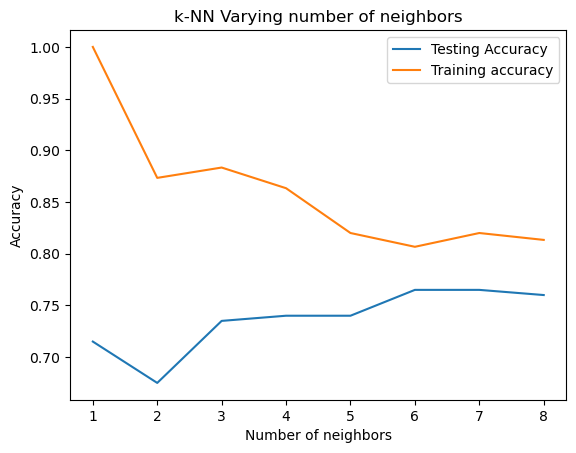

In [38]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [40]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.765

In [42]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [43]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[68, 20],
       [27, 85]], dtype=int64)

###### Considering confusion matrix above:
True negative = 68
False positive = 20
True postive = 85
Fasle negative = 27

In [45]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,68,20,88
1,27,85,112
All,95,105,200


In [46]:
#import classification_report
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        88
           1       0.81      0.76      0.78       112

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



In [48]:
#ROC(Reciever Operating Charecteristic) curve
#It is a plot of the true positive rate against the false positive rate for the different possible cutpoints.
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [49]:
from sklearn.metrics import roc_curve

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

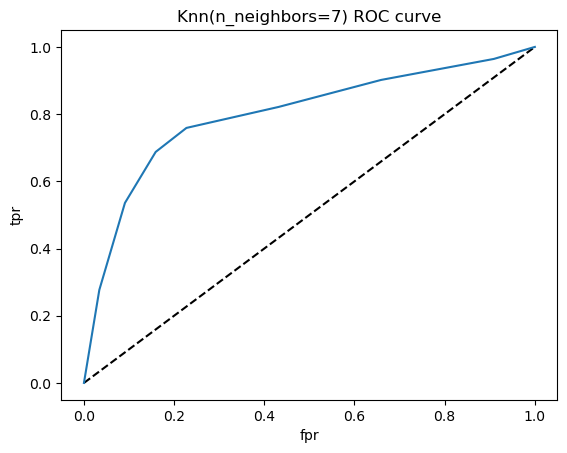

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [52]:
#Area under ROC curve
#The area under the curve is a measure of test accuracy.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7988027597402598

In [53]:
#Cross Validation for best k value
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [54]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [55]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [56]:
knn_cv.best_score_

0.796

In [57]:
knn_cv.best_params_

{'n_neighbors': 8}

###### Thus a knn classifier with number of neighbors as 8 achieves the best score/accuracy of 0.796 i.e about 79%
Interpretation: The KNN model with k=7 achieved an overall accuracy of 79%, indicating a strong ability to correctly predicts. With a precision of 0.94%, the model is highly accurate when predicting positive cases.